In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

#그래프에서 한글 깨짐 방지
import matplotlib
from matplotlib import font_manager,rc
font_path="C:\Windows\Fonts\malgun.ttf"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
matplotlib.rcParams['axes.unicode_minus']=False

## 데이터 선정
전자상거래 데이터 df

In [2]:
df=pd.read_excel("./data/Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## 데이터 분석 과제 설정

### 데이터 검토

In [3]:
#데이터 유형과 개수를 확인하기 위한 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#숫자형 변수에 대한 요약 통계량을 통해 전처리 작업을 위한 정보를 파악한다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 데이터 전처리

In [5]:
#거래가 취소된 송장번호를 문자열로 치환하여 골라낸다.
cancelled=df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [6]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


취소된 거래 중 Quantity가 양수인 거래는 하나도 없음.
하지만 Quantity가 음수이거나 0인 거래 중 일부는 취소된 거래에 속하지 않은 경우도 있음.

In [7]:
len(cancelled),df[df['Quantity']<=0]['Quantity'].count()

(9288, 10624)

In [8]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [9]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


위의 두 셀로 보아 UnitPrice가 0인 경우는 2515건, 음수인 경우는 2건인 것을 알 수 있다.

이 때, 취소되지 않은 거래인 InvoiceNo가 'C'로 시작하지 않은 거래 중 일부가 Quanitity<0||Quantity==0 이지만, 이 경우에 해당하는 모든 거래는 UnitPrice가 0인 것을 확인할 수 있다.

In [10]:
d=df[~df['InvoiceNo'].astype(str).str.contains('C')] #송장번호에 C를 포함하지 않는 entry(거래가 취소되지 않은 entry) 데이터 프레임
print("취소되지 않은 거래 중 Quantity가 0이거나 음수인 거래 횟수 :",len(d[d['Quantity']<=0]))
print("취소되지 않은 거래 중 UnitPrice가 0이면서 Quantity가 0이거나 음수인 거래 횟수 :",len(d[(d['Quantity']<=0)&(d['UnitPrice']==0)]))

취소되지 않은 거래 중 Quantity가 0이거나 음수인 거래 횟수 : 1336
취소되지 않은 거래 중 UnitPrice가 0이면서 Quantity가 0이거나 음수인 거래 횟수 : 1336


In [11]:
#데이터세트 재정립
data=df[(df['UnitPrice']>0)&(df['Quantity']>0)]
data=data.reset_index()
data=data.drop('index',axis=1)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
#중복 관측값 삭제
data.drop_duplicates(inplace=True)
data=data.dropna(subset=['CustomerID'])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 530103
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [14]:
# 각 날짜 변수 생성
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['year_month'] = data['InvoiceDate'].dt.strftime('%Y-%m')
data['hour'] = data['InvoiceDate'].dt.hour
# 판매액 변수(Revenue) 생성
data['Revenue'] = data['UnitPrice'] * data['Quantity']

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,year_month,hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,Friday,2011-12,12,10.20
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,Friday,2011-12,12,12.60
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,2011-12,12,16.60
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,2011-12,12,16.60


## 데이터 분석

### 월별 판매
### 단위 가격 당 제품 거래 수량

Text(1.0, 1.0, '(단위: 백만 파운드)')

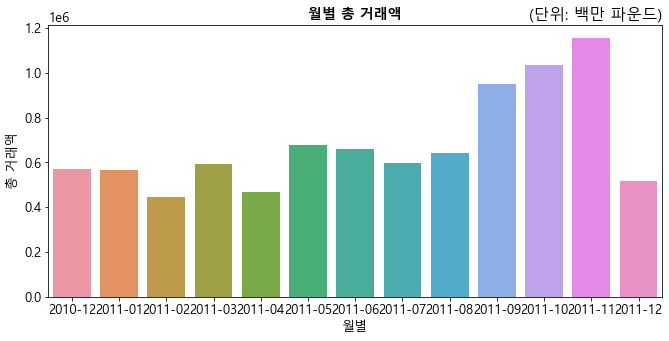

In [37]:
#월별에 따른 총 거래액 
monthly = pd.DataFrame(data.groupby(['year_month'])['Revenue'].sum()).reset_index()
plt.figure(figsize = (11,5))
sns.barplot(x="year_month", y="Revenue", data = monthly)
plt.xlabel('월별')
plt.ylabel('총 거래액')
plt.title('월별 총 거래액', fontsize=14, fontweight='bold')
plt.title('(단위: 백만 파운드)', loc='right')

각 연도-월에 따른 총 거래액이다.
12월에 경우 2010년과 2011년이 비슷한 추이를 보이고 있으며 상반기에는 일정한 분포를 보이던 그래프가 9월부터는 급격하게 증가하는 것을 알 수 있다.

In [38]:
model=smf.ols('Revenue~year_month',data)
olsfit=model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.649
Date:                Sun, 08 May 2022   Prob (F-statistic):            0.00149
Time:                        16:57:13   Log-Likelihood:            -2.8113e+06
No. Observations:              392692   AIC:                         5.623e+06
Df Residuals:                  392679   BIC:                         5.623e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.22

year_month와 Revenue의 선형회귀 결과는 위와 같다.
year_month가 숫자형이 아닌 문자형 변수로 취급되어 더미 변수로서 2010-12 변수가 기준이 된 것을 볼 수 있다. 하지만 2011-01부터 2011-11까지의 p-value값이 0.05가 넘어 유의수준 5%에서 해당 변수들이 통계적으로 유의하지 않음을 알 수 있다.
하지만 2011-12 또한 12월 전체가 아닌 9일까지만의 거래를 취급했으므로 현재로써는 통계적으로 유의하지만 월 전체 데이터를 취급하게 된다면 상황이 바뀔 수도 있을 것 같다.

In [39]:
model=smf.ols('Revenue~month',data)
olsfit=model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.578
Date:                Sun, 08 May 2022   Prob (F-statistic):              0.108
Time:                        17:04:35   Log-Likelihood:            -2.8113e+06
No. Observations:              392692   AIC:                         5.623e+06
Df Residuals:                  392690   BIC:                         5.623e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4059      1.211     20.145      0.0

연도_월이 아닌 단순히 월로 바꾸어 선형회귀를 해보았다.
하지만 이 때에도 month의 p-value가 0.108로 통계적으로 유의하지 않음을 알 수 있다.

In [40]:
model=smf.ols('Revenue~month+year',data)
olsfit=model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.350
Date:                Sun, 08 May 2022   Prob (F-statistic):              0.259
Time:                        17:09:15   Log-Likelihood:            -2.8113e+06
No. Observations:              392692   AIC:                         5.623e+06
Df Residuals:                  392689   BIC:                         5.623e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1524.9329   4296.153      0.355      0.7

위는 month와 year로 다중 선형회귀를 실행해본 결과다.
다중 선형회귀 결과 또한 month, year 모두가 p-value가 0.05보다 커 통계적으로 유의하지 않음을 알 수 있다.

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

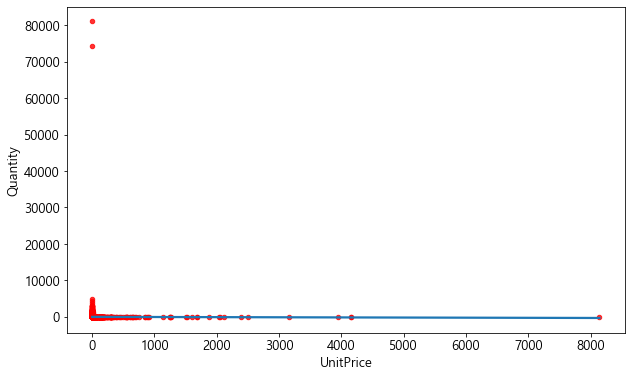

In [25]:
# 단위 가격 당 제품 거래 수량의 관계 산점도
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams.update({'font.size':13})
sns.regplot('UnitPrice','Quantity',data=data,order=1,ci=None,scatter_kws={'color':'r','s':20})

In [29]:
model=smf.ols('Quantity~UnitPrice',data)
olsfit=model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.231
Date:                Sun, 08 May 2022   Prob (F-statistic):            0.00412
Time:                        16:23:51   Log-Likelihood:            -2.5975e+06
No. Observations:              392692   AIC:                         5.195e+06
Df Residuals:                  392690   BIC:                         5.195e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2358      0.291     45.507      0.0

위의 추정 결과를 보았을 때, UnitPrice의 p-value가 0.004 로 유의수준 1% 내에서도 통계적으로 유의하다. (유의수준 5% 내에서도 해당)
UnitPrice에 1단위가 높아질 때마다 제품 판매 수량이 평균적으로 0.0372만큼 낮아지는 것을 알 수 있다.
통상적으로 생각할 수 있듯이, 생산 가격이 높아지면 상대적으로 수요가 낮아지는 것으로 결론 내릴 수 있다.
fitting한 선형 회귀 모델을 산점도 위에 그려보자.

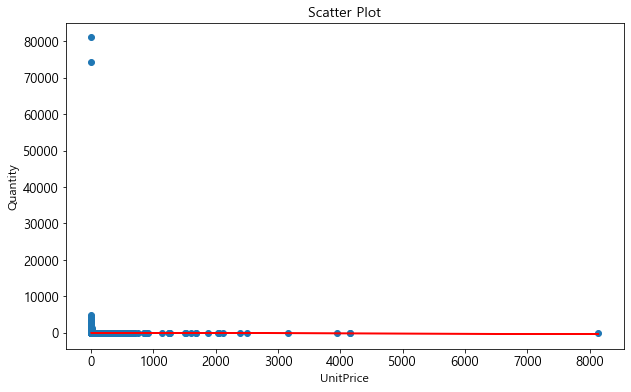

In [30]:
y_pred=olsfit.predict(data['UnitPrice'])
plt.scatter(data['UnitPrice'], data['Quantity'])
plt.plot(data['UnitPrice'], y_pred, color='red')
plt.title('Scatter Plot', fontsize=14)
plt.xlabel('UnitPrice', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

위의 산점도 그림과 많은 차이가 없는 것을 볼 수 있다. 선형 회귀선이 0에 근접하므로 가격에 상관없이 거래 수량은 항상 일정한 분포를 보인다는 것을 알 수 있다.
그렇다면 로지스틱 회귀분석을 실행하면 어떤 결과가 나올까?

In [33]:
model=smf.logit('Quantity~UnitPrice',data)
logitfit=model.fit()
print(logitfit.summary())

ValueError: endog must be in the unit interval.

로지스틱 회귀분석은 실행되지 않았다.
ValueError: endog must be in the unit interval. 오류가 발생하였는데, 원인으로는
로지스틱 회귀분석을 실행해주는 Logit의 기본 분포는 값 0과 1을 취하는 베르누이 분포이다. 이것은 0과 1 사이의 값으로 확장될 수 있지만 함수는 단위 간격 외부에서 정의되지 않는다. 또한 logit은 회귀가 아닌 분류 문제에서 사용하고 회귀를 해야하고 언바운드 연속 데이터의 경우 일반적인 모델은 OLS를 사용한다.